<a href="https://colab.research.google.com/github/cyber-privacy-analytics/DataScienceChegg/blob/main/Linear_Regression_with_OLS_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine


In [ ]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

import warnings
warnings.filterwarnings('ignore')


In [ ]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
houseprices_df = pd.read_sql_query('select * from houseprices',con=engine)

# No need for an open connection, because you're only doing a single query
engine.dispose()


houseprices_df.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


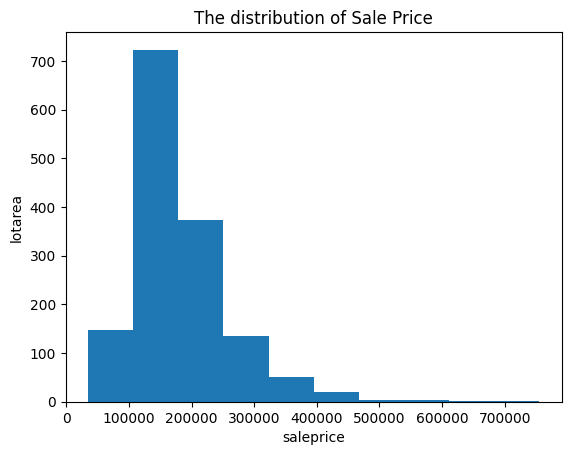

In [ ]:
plt.hist(houseprices_df.saleprice)
plt.title("The distribution of Sale Price")
plt.xlabel("saleprice")
plt.ylabel("lotarea")
plt.show()

In [ ]:
houseprices_df['salecondition'].value_counts()

,count
salecondition,
Normal,1198
Partial,125
Abnorml,101
Family,20
Alloca,12
AdjLand,4


In [ ]:
salecondition_df = pd.get_dummies(houseprices_df['salecondition'])
salecondition_df.head()

,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,False,False,False,False,True,False
1,False,False,False,False,True,False
2,False,False,False,False,True,False
3,True,False,False,False,False,False
4,False,False,False,False,True,False


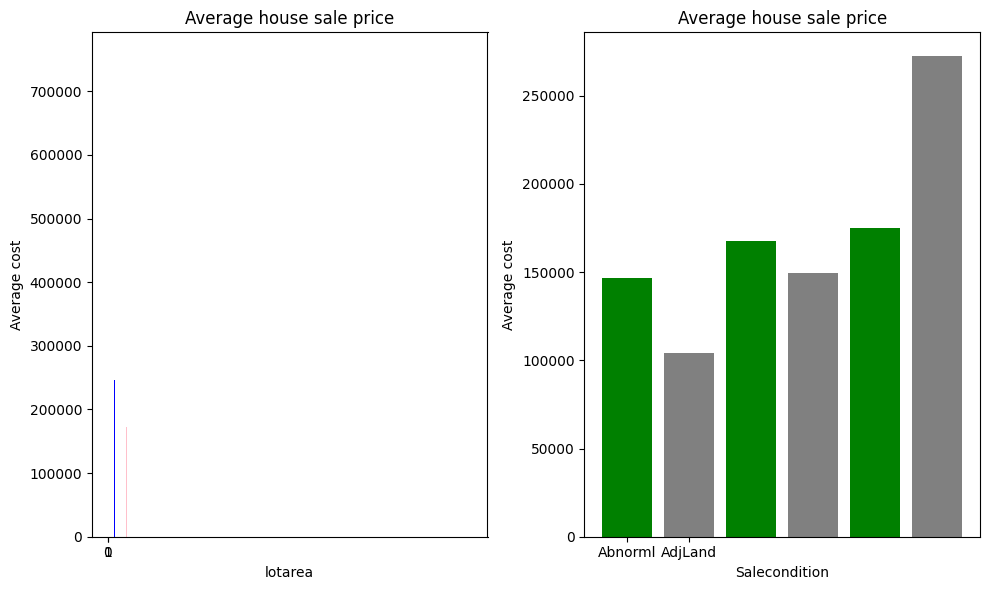

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.bar(houseprices_df.groupby("lotarea")["saleprice"].mean().index, houseprices_df.groupby("lotarea")["saleprice"].mean(),
       color=("pink","blue"))
plt.title("Average house sale price")
plt.ylabel("Average cost")
plt.xlabel("lotarea")
plt.xticks([0,1])

plt.subplot(1,2,2)
plt.bar(houseprices_df.groupby("salecondition")["saleprice"].mean().index, houseprices_df.groupby("salecondition")["saleprice"].mean(),
       color=("green","grey"))
plt.title("Average house sale price")
plt.ylabel("Average cost")
plt.xlabel("Salecondition")
plt.xticks([0,1])

plt.tight_layout()
plt.show()